# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem


The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the $n^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### APPUNTI

Rischio di avere ridondanza (invariaza per shift di una casella). Elimino ridondanza paretendo sempre dalla stessa citta (devo averla fissa come punto di partenza). Ho infatti che sono delle sequenze equivalenti le seguenti:
$$ [1, 2, 3, 4, 5]$$
$$ [2, 3, 4, 5, 1]$$
Importante programmare un operatore di check (sono i punti compatibili ai vincoli, devo passare da una sola citta e ne visito una sola alla volta). Rischio di bachi (peggiore e non prendere tutte le citta, chiaramente se ne visito meno ottengo un percorso piu vantaggioso)
Operatore genetico che potremmo introdurre per la sola mutazione e una permutazione di citta, se cambio allele su singolo gene esco dal vincolo, nobn e piu una operazione interna.
posso pensare anche ad uno  shift di piu di una citta, ossia:
$$[1, 2, 3, 4, 5] = [1, 4, 5, 2, 3]$$
Se permuto pezzi di percorso e piu facile che io preservi la sequenza che ho generato.
Ho ridondanza, ma piu mi muovo in modo vario, piu e probabile che io sondi bene tutte le possibili soluzioni.
Devo ora implementare l operatore di crossover (e spiegato piu avanti come viene implementato, sembra molto trap)

Per quanto riguarda selezione e ordinamento viene proposta una roulette di questo tipo, ossia ho che j e la 

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

$$
p(conta)\,=\,\left[0.2,\,0.1,\,0.05,\,0.03\right]
$$

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">

    a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
    
    </span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [21]:
best_cer = np.loadtxt("Osservabili/best_circ.dat", unpack = True)
best_sq = np.loadtxt("Osservabili/best_sq.dat", unpack = True)

av_cer = np.loadtxt("Osservabili/mean_circ.dat", unpack = True)
av_sq = np.loadtxt("Osservabili/mean_sq.dat", unpack = True)

cerc = np.loadtxt("Config/best_circ.dat", unpack = True)
quad = np.loadtxt("Config/best_sq.dat", unpack = True)

### Test metodi di inizializzazione

Il problema che stiamo considerando consiste in un cammino costituito da 34 città. Le situazioni che vengono analizzate sono le seguenti, ossia:
- città randomicamente distribuite su una circonferenza

- città randomicamente distribuite in un quadrato

Per verificare la correttezza dei metodi utilizzati vengono in seguito riportate due configurazioni generate:

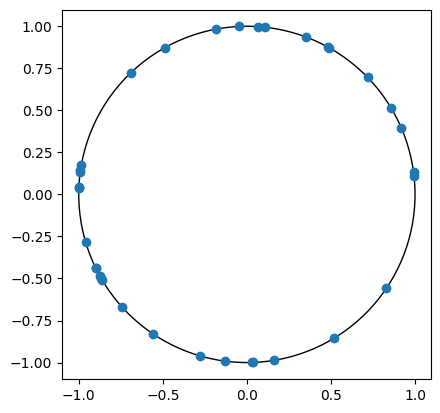

In [22]:
punti = np.loadtxt("Config/circonferenza.dat", unpack = True)

figure, axes = plt.subplots()
cerchio = plt.Circle((0,0), 1, fill = False)

axes.set_aspect(1)
axes.add_artist(cerchio)

plt.scatter(punti[ 0 , : ], punti[ 1 , :])
plt.show()


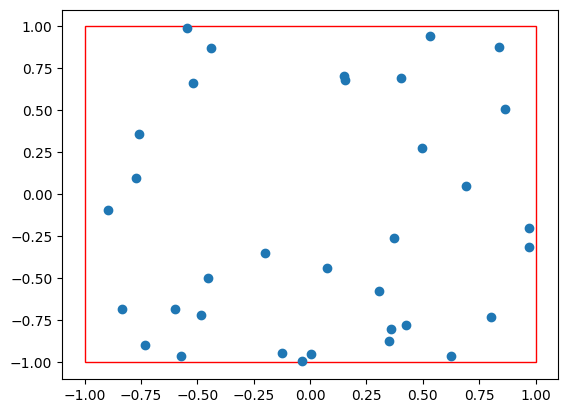

In [23]:
punti = np.loadtxt("Config/quadrato.dat", unpack = True)

fig, ax = plt.subplots()
square = patches.Rectangle((-1,-1), 2, 2, linewidth = 1, edgecolor = 'r', facecolor = 'none')

ax.add_patch(square)
plt.scatter(punti[ 0 , : ], punti[ 1 , :])
plt.show()



## Circonferenza

#### Senza crossover

$$
\begin{cases}
    N_{gen}\,=\, 1000\\
    N_{pop}\,=\,300
\end{cases}
$$

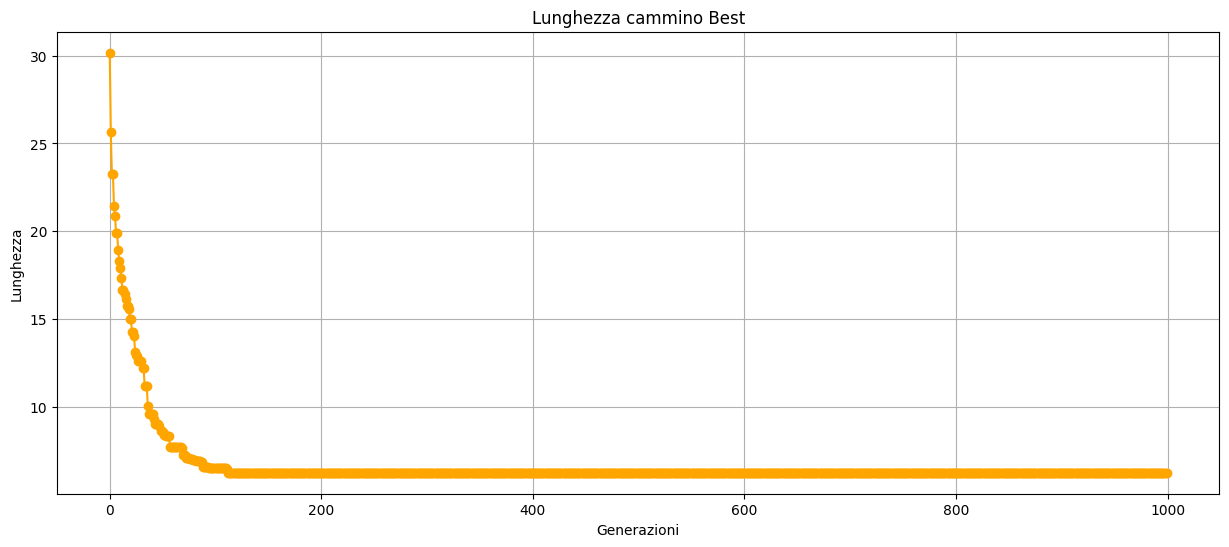

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))

ax.errorbar(best_cer[0, 0:1000], best_cer[1, 0:1000], color = 'orange', fmt = 'o-')
ax.set_xlabel("Generazioni")
ax.set_ylabel("Lunghezza")
ax.set_title("Lunghezza cammino Best")
ax.grid(True)

plt.show()

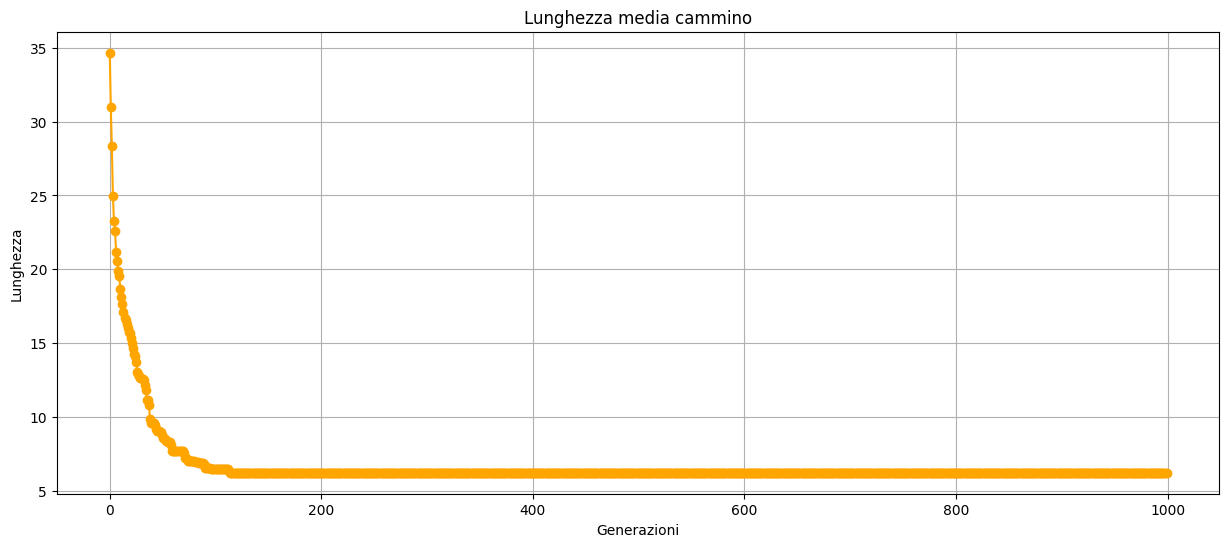

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))

ax.errorbar(av_cer[0, 0:1000], av_cer[1, 0:1000], color = 'orange', fmt = 'o-')
ax.set_xlabel("Generazioni")
ax.set_ylabel("Lunghezza")
ax.set_title("Lunghezza media cammino")
ax.grid(True)

plt.show()

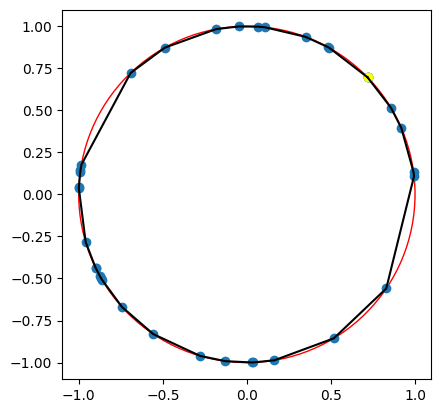

In [26]:
figure, axes = plt.subplots()
cerchio = plt.Circle((0,0), 1, fill = False, color = 'red')

axes.set_aspect(1)
axes.add_artist(cerchio)

plt.scatter(cerc[ 0 , 0:35], cerc[ 1 , 0:35])
plt.scatter(cerc[ 0 , 0], cerc[ 1 , 0], color = 'yellow')
plt.plot(cerc[ 0 , 0:35 ], cerc[ 1 , 0: 35], color = "black")
plt.show()

#### Con crossover

$$
\begin{cases}
    N_{gen}\,=\,1000 \\
    N_{camm}\,=\,300
\end{cases}
$$

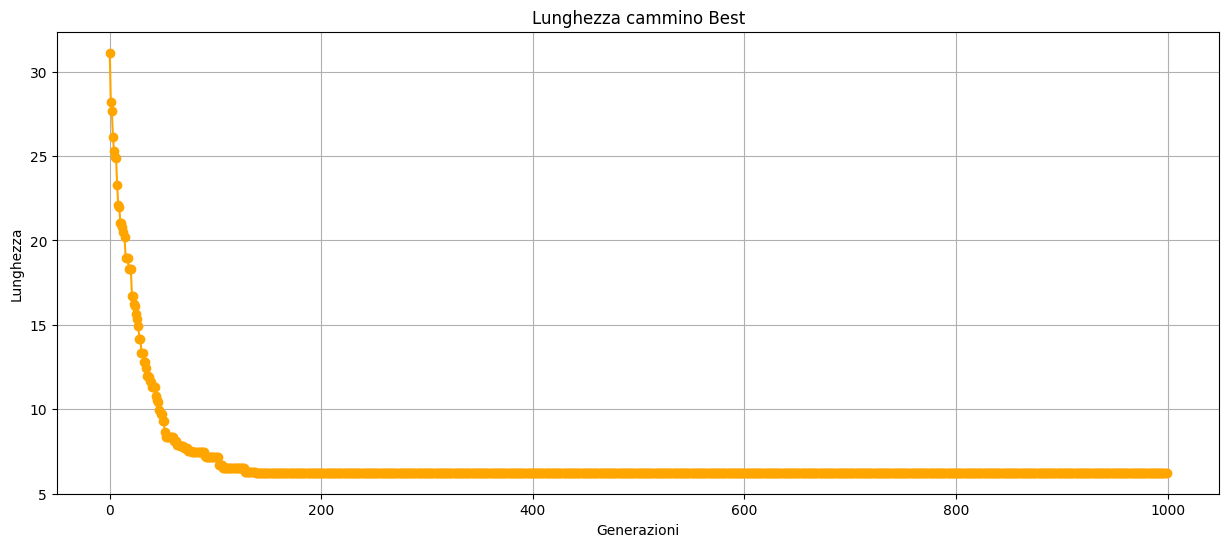

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))

ax.errorbar(best_cer[0, 1000:2000], best_cer[1, 1000:2000], color = 'orange', fmt = 'o-')
ax.set_xlabel("Generazioni")
ax.set_ylabel("Lunghezza")
ax.set_title("Lunghezza cammino Best")
ax.grid(True)

plt.show()

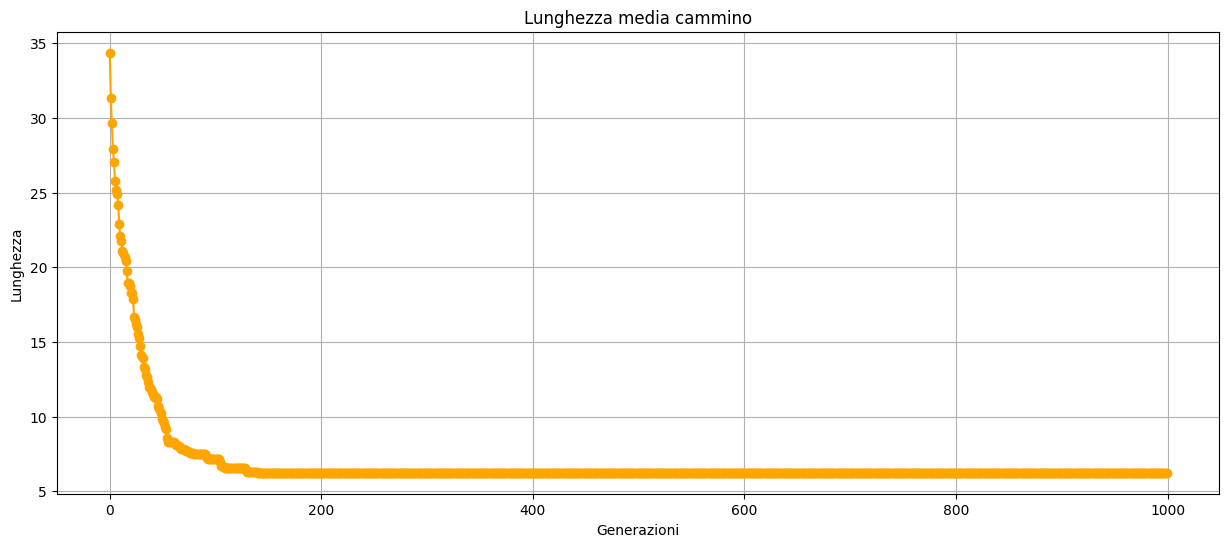

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))

ax.errorbar(av_cer[0, 1000:2000], av_cer[1, 1000:2000], color = 'orange', fmt = 'o-')
ax.set_xlabel("Generazioni")
ax.set_ylabel("Lunghezza")
ax.set_title("Lunghezza media cammino")
ax.grid(True)

plt.show()

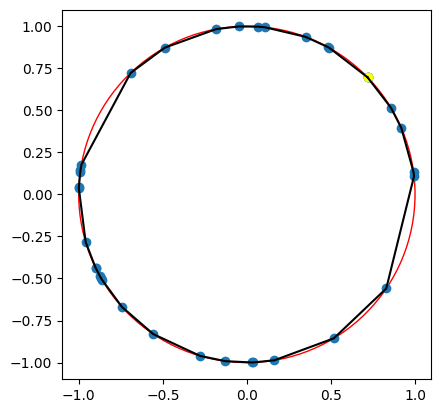

In [29]:
figure, axes = plt.subplots()
cerchio = plt.Circle((0,0), 1, fill = False, color = 'red')

axes.set_aspect(1)
axes.add_artist(cerchio)

plt.scatter(cerc[ 0 , 35:70], cerc[ 1 , 35:70])
plt.scatter(cerc[ 0 , 35], cerc[ 1 , 35], color = 'yellow')
plt.plot(cerc[ 0 , 35:70 ], cerc[ 1 , 35: 70], color = "black")
plt.show()

## Quadrato

#### Senza crossover

$$
\begin{cases}
    N_{gen}\,=\,1000 \\
    N_{camm}\,=\,300
\end{cases}
$$

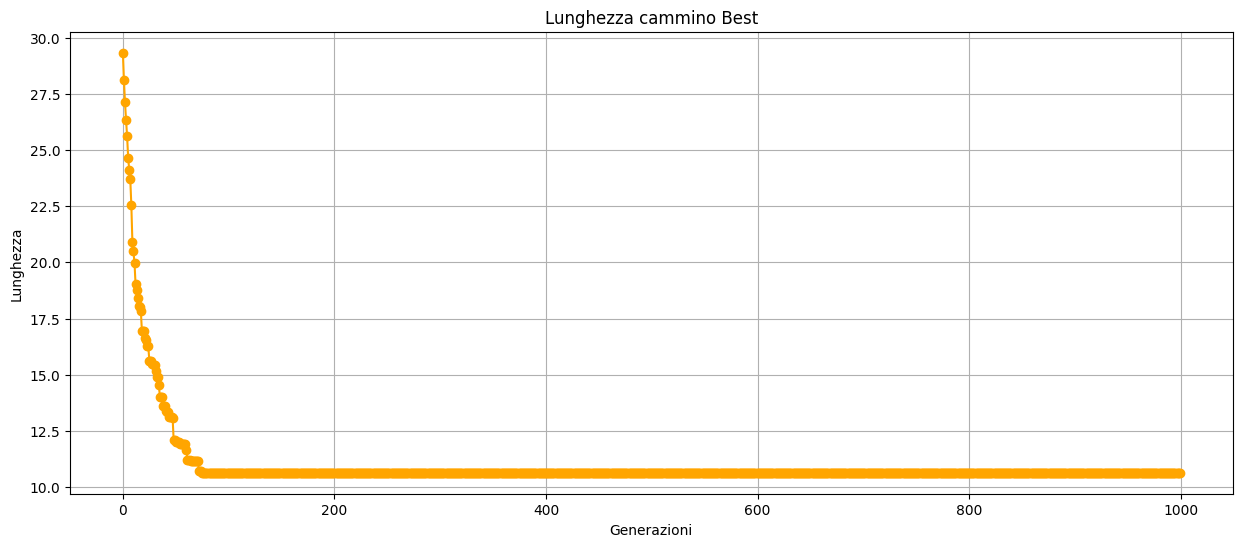

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))

ax.errorbar(best_sq[0, 0:1000 ], best_sq[1, 0:1000 ], color = 'orange', fmt = 'o-')
ax.set_xlabel("Generazioni")
ax.set_ylabel("Lunghezza")
ax.set_title("Lunghezza cammino Best")
ax.grid(True)

plt.show()

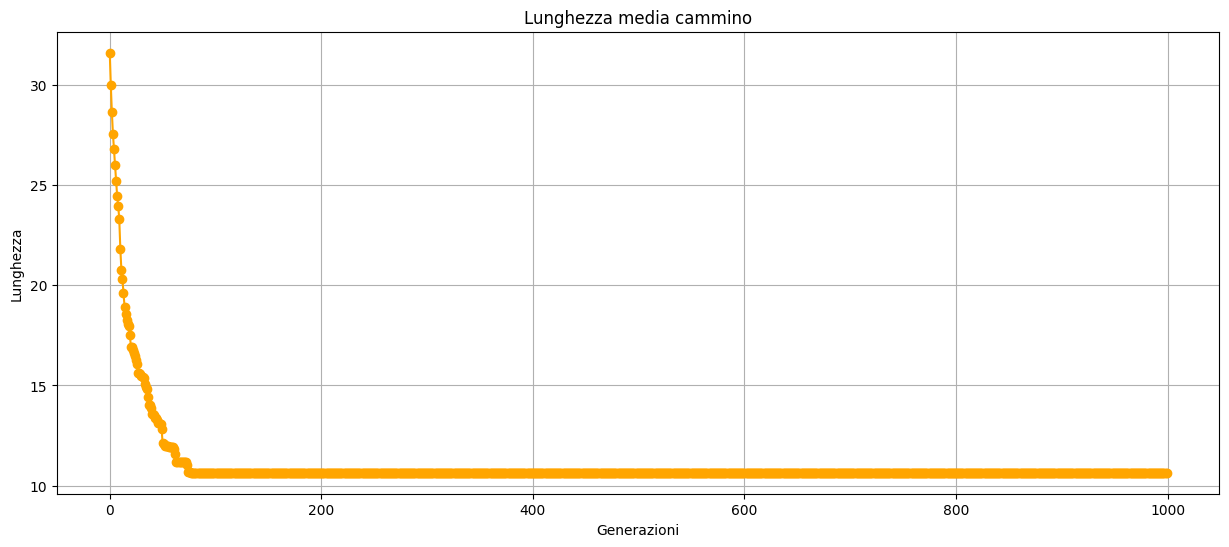

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))

ax.errorbar(av_sq[0, 0:1000 ], av_sq[1, 0:1000 ], color = 'orange', fmt = 'o-')
ax.set_xlabel("Generazioni")
ax.set_ylabel("Lunghezza")
ax.set_title("Lunghezza media cammino")
ax.grid(True)

plt.show()

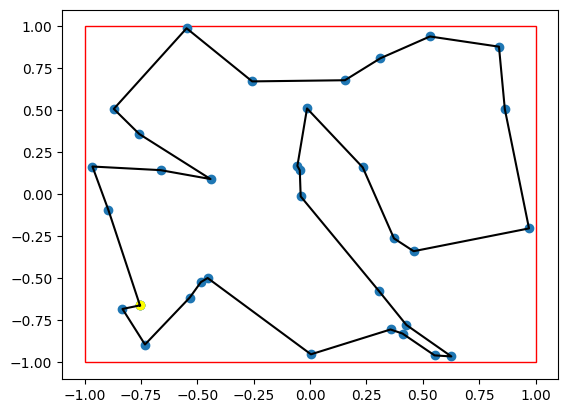

In [32]:
fig, ax = plt.subplots()

square = patches.Rectangle((-1,-1), 2, 2, linewidth = 1, edgecolor = 'r', facecolor = 'none')
ax.add_patch(square)

plt.scatter(quad[ 0 , 0:35 ], quad[ 1 , 0:35 ])
plt.scatter(quad[ 0 , 0], quad[ 1 , 0], color = 'yellow')
plt.plot(quad[ 0 , 0:35], quad[ 1 , 0:35], color = "black")
plt.show()

#### Con crossover

$$
\begin{cases}
    N_{gen}\,=\,1000 \\
    N_{camm}\,=\,300
\end{cases}
$$

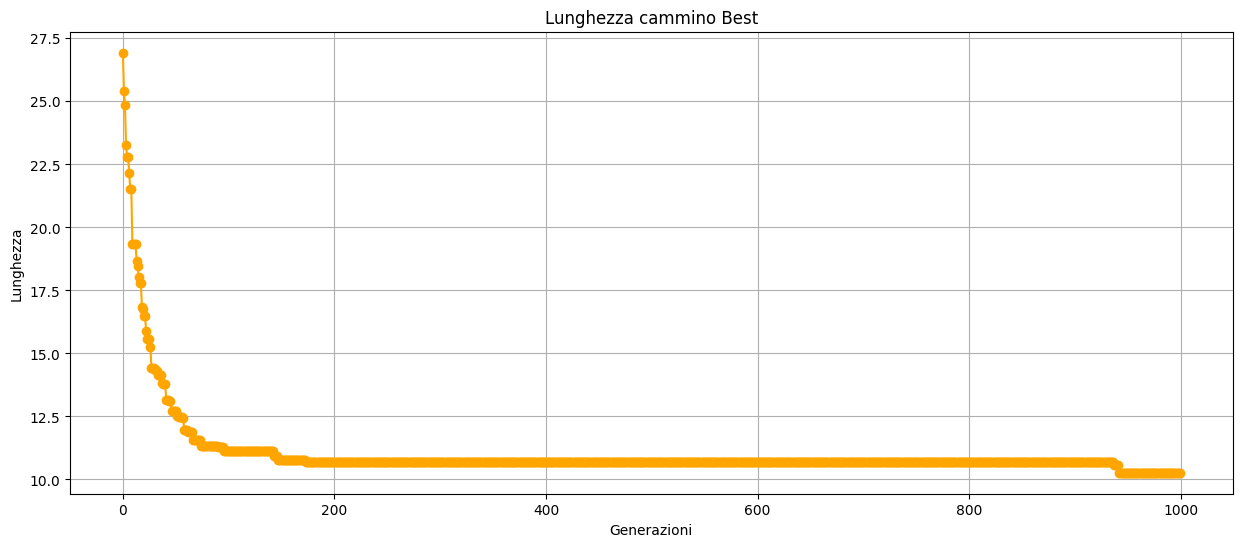

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))

ax.errorbar(best_sq[0, 1000:2000 ], best_sq[1, 1000:2000 ], color = 'orange', fmt = 'o-')
ax.set_xlabel("Generazioni")
ax.set_ylabel("Lunghezza")
ax.set_title("Lunghezza cammino Best")
ax.grid(True)

plt.show()

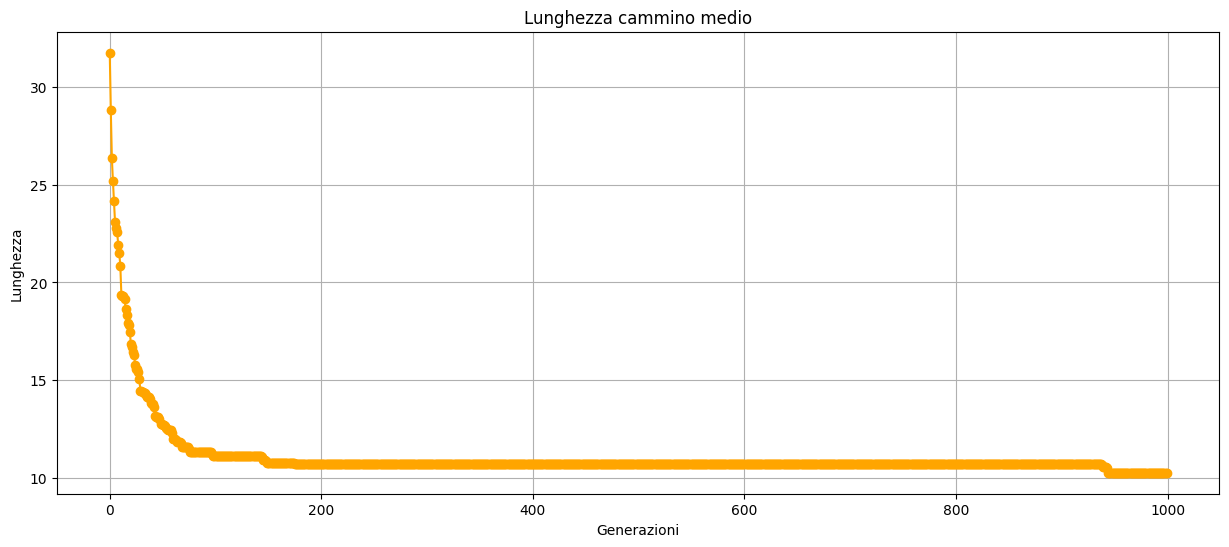

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))

ax.errorbar(av_sq[0, 1000:2000 ], av_sq[1, 1000:2000 ], color = 'orange', fmt = 'o-')
ax.set_xlabel("Generazioni")
ax.set_ylabel("Lunghezza")
ax.set_title("Lunghezza cammino medio")
ax.grid(True)

plt.show()

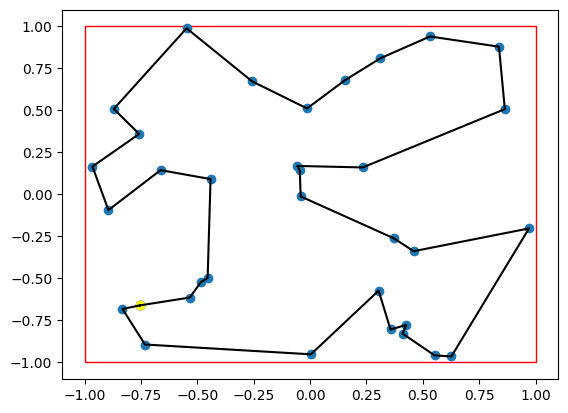

In [35]:
fig, ax = plt.subplots()
square = patches.Rectangle((-1,-1), 2, 2, linewidth = 1, edgecolor = 'r', facecolor = 'none')

ax.add_patch(square)

plt.scatter(quad[ 0 , 35:70 ], quad[ 1 , 35:70 ])
plt.scatter(quad[ 0 , 35], quad[ 1 , 35], color = 'yellow')
plt.plot(quad[ 0 , 35:70], quad[ 1 , 35:70], color = "black")
plt.show()

### Confronto fra percorso ottimizzato e non

In [36]:
val = np.loadtxt('Config/Inizio.dat', unpack = True)

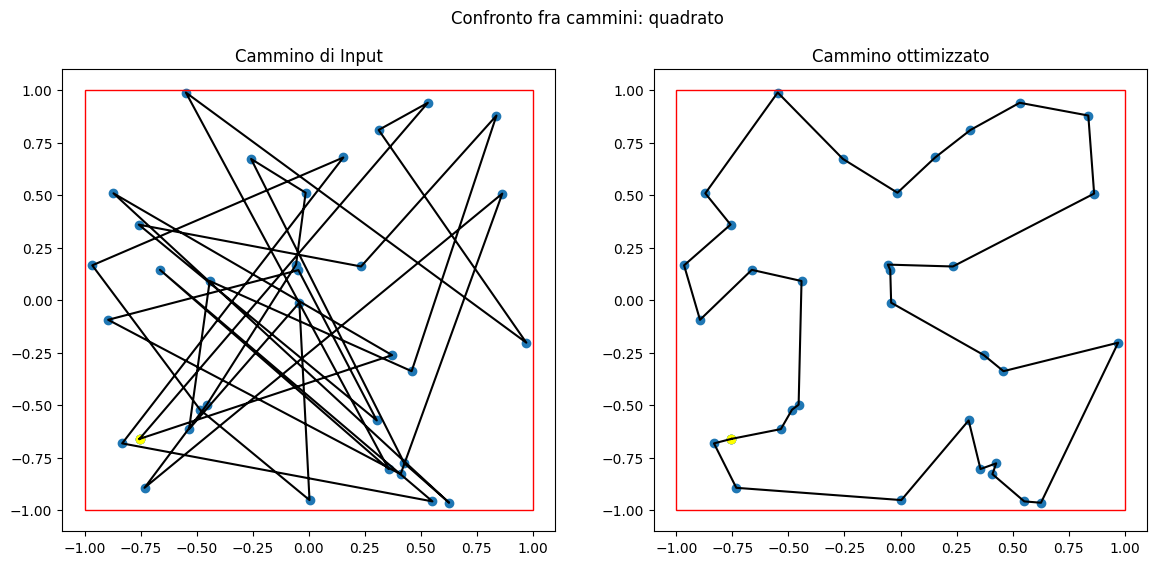

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
titoli = np.array(['Cammino di Input', 'Cammino ottimizzato'])

for i in range(0, 2):
    if i==0:
        ax[i].scatter(val[ 0 , 35:70 ], val[ 1 , 35:70 ])
        ax[i].scatter(val[ 0 , 35], val[ 1 , 35], color = 'yellow')
        ax[i].plot(val[ 0 , 35:70], val[ 1 , 35:70], color = "black")

    else:
        ax[i].scatter(quad[ 0 , 35:70 ], quad[ 1 , 35:70 ])
        ax[i].scatter(quad[ 0 , 35], quad[ 1 , 35], color = 'yellow')
        ax[i].plot(quad[ 0 , 35:70], quad[ 1 , 35:70], color = "black")

    square = patches.Rectangle((-1,-1), 2, 2, linewidth = 1, edgecolor = 'r', facecolor = 'none')
    ax[i].add_patch(square)

    ax[i].set_title(titoli[i])

fig.suptitle('Confronto fra cammini: quadrato')
plt.show()

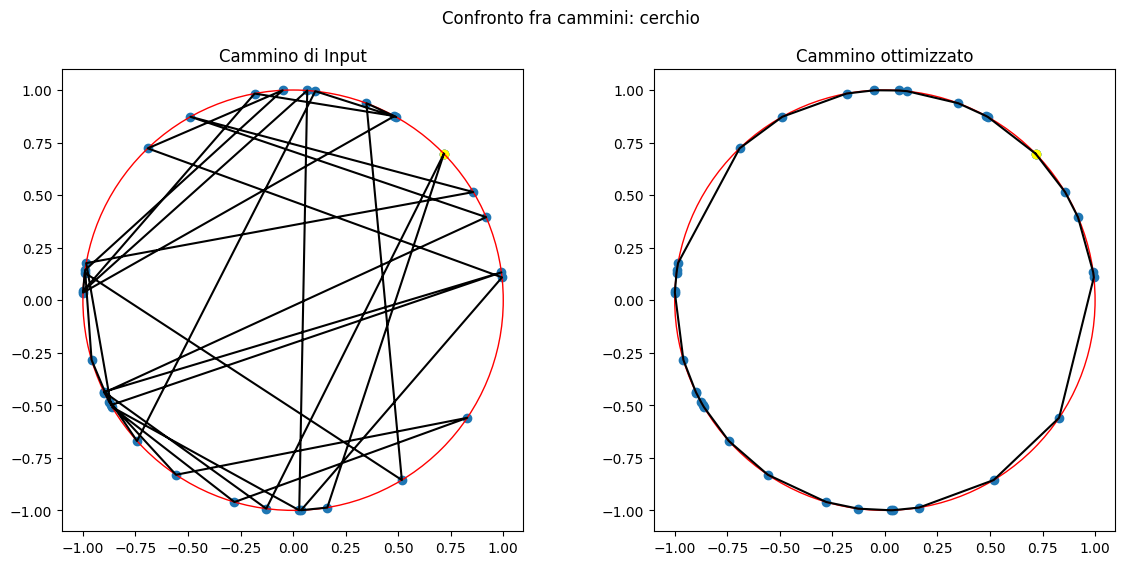

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
titoli = np.array(['Cammino di Input', 'Cammino ottimizzato'])

for i in range(0, 2):
    if i==0:
        ax[i].scatter(val[ 0 , 0:35 ], val[ 1 , 0:35 ])
        ax[i].scatter(val[ 0 , 0], val[ 1 , 0], color = 'yellow')
        ax[i].plot(val[ 0 , 0:35], val[ 1 , 0:35], color = "black")

    else:
        ax[i].scatter(cerc[ 0 , 35:70 ], cerc[ 1 , 35:70 ])
        ax[i].scatter(cerc[ 0 , 35], cerc[ 1 , 35], color = 'yellow')
        ax[i].plot(cerc[ 0 , 35:70], cerc[ 1 , 35:70], color = "black")

    cerchio = plt.Circle((0,0), 1, fill = False, color = 'red')
    ax[i].set_aspect(1)
    ax[i].add_artist(cerchio)

    ax[i].set_title(titoli[i])

fig.suptitle('Confronto fra cammini: cerchio')
plt.show()